<a href="https://colab.research.google.com/github/ashutosh-619/The-Sparks-Foundation-Internship/blob/main/Task_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Linear Regression is a supervised learning algorithm which is mostly used to determine the relationship between one independent variable (predictor) and one dependent variable (response).

In [ ]:
#We start by importing the necessary libraries.
import numpy as np                                #For data handling and linear algebra
import pandas as pd                               #To deal with dataframes
import matplotlib.pyplot as plt                   #For data visualization
%matplotlib inline

In [ ]:
#To read a csv file from a url, we make use of the read_csv function from the pandas library.
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported.")

Data imported.


In [ ]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


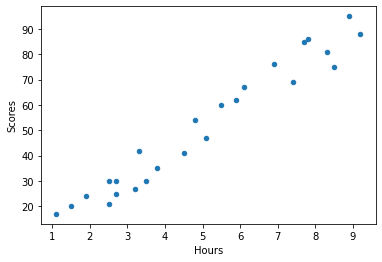

In [ ]:
#To visually capture the relationship between the two variables, we make a scatterplot

data.plot.scatter('Hours', 'Scores')

In [ ]:
#As we can see in the above plot, the two variables definitely have a linear relationship between them and hence we can try to fit a Linear Regression model over them.

In [ ]:
#Next, we separate the data into X and y, basically, into inputs and outputs. y is the dependent variable.
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
#We now split our data into train and test sets using sklearn's train_test_split function.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)  #test_size parameters indicates that 20% of the data would be put in the test set.

In [ ]:
#Finally, to create our model, we import LinearRegression from sklearn's linear_model module.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()        #the default parameters are set.
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To obtain the coefficient and the intercept, we make use of .coef_ and .intercept_
print("Coeffiecent: ", linreg.coef_)
print("Intercept: ", linreg.intercept_)

Coeffiecent:  [9.72121616]
Intercept:  1.9451320503533722


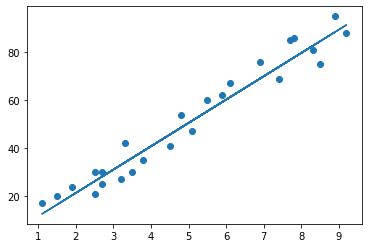

In [ ]:
#Now we plot the line along with the points.
reg_line = (linreg.coef_ * X) + linreg.intercept_                   #line is of the form y = b1X + b0 where b1 is the coefficient and b0 is the intercept

plt.scatter(X, y)
plt.plot(X, reg_line)
plt.show()

In [ ]:
#As it can be observed, the line above seems to be a good fit for a given dataset.

In [ ]:
#To get an approxiamation as to how well our algorithm did, we first pass the X_test through .predict() and then compare the values obtained to the actual ones.
y_pred = linreg.predict(X_test)

In [ ]:
cmp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
cmp_df

,Actual,Predicted
0,81,82.631226
1,60,55.411821
2,30,26.248172
3,54,48.606970
4,85,76.798496


In [ ]:
#As we can see, our model did a good job in fitting the line.
#Now we can also use our line for making predictions on our own data.
hrs = [[9.25]]
pred = linreg.predict(hrs)
print("Number of hours: ", hrs)
print("Predicted score: ", pred)

Number of hours:  [[9.25]]
Predicted score:  [91.86638149]


In [ ]:
#Finally we can evaluate our model using metrics from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))

Mean Absolute Error:  4.7131533506920755
Mean Squared Error:  26.827586729996607
R2 Score:  0.9323219305499582
